In [1]:
import pandas as pd
import io
from google.colab import files
uploaded = files.upload() 

Saving TelcoChurn.csv to TelcoChurn.csv


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
data = pd.read_csv(io.BytesIO(uploaded['TelcoChurn.csv']))

In [5]:
#shape of dataset
print("shape of dataframe is : ", data.shape)

shape of dataframe is :  (7043, 21)


In [6]:
# summary of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Setting display features to ensure features name(columns) visibility

In [7]:
pd.set_option('display.max_columns',None)

In [8]:
#Get Statistical details of data
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
import warnings
warnings.filterwarnings('ignore')

Data Cleaning


In [ ]:
#checking number of null values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#Drop employee_id column as it is just a unique id
data.drop("customerID",inplace=True,axis=1)

# Label the Churn feature to 1/**0**

In [ ]:
data['Churn'].value_counts()


No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
data['Churn']= np.where(data['Churn']=="Yes",1,0)

# Defining Target and Independent Features

In [ ]:
Y=data[['Churn']]
X=data.drop(['Churn'],axis=1)

# Get the Churn Rate

In [ ]:
Y.mean()

Churn    0.26537
dtype: float64

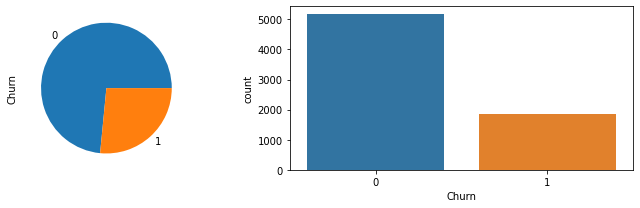

In [ ]:
# chart for distribution of target variable
# (One can use any visualization or chart type he/she is comfortable with)
fig= plt.figure(figsize=(10,3))
fig.add_subplot(1,2,1)
a= data["Churn"].value_counts(normalize=True).plot.pie()
fig.add_subplot(1,2,2)
churnchart=sns.countplot(x=data["Churn"])
plt.tight_layout()
plt.show()

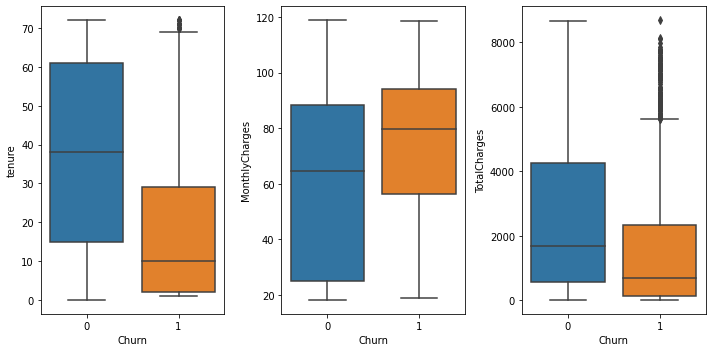

In [ ]:
# Visualize relationship between Churn and other features
fig= plt.figure(figsize=(10,5) )
fig.add_subplot(1,3,1)
ar_6=sns.boxplot(x=data["Churn"],y=data["tenure"])
fig.add_subplot(1,3,2)
ar_6=sns.boxplot(x=data["Churn"],y=data["MonthlyCharges"])
fig.add_subplot(1,3,3)
ar_6=sns.boxplot(x=data["Churn"],y=data["TotalCharges"])
plt.tight_layout()
plt.show()

# Split features into Numerical and Categorical

In [ ]:
num=X.select_dtypes(include="number")
char=X.select_dtypes(include="object")

In [ ]:
num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [ ]:
#Check whether SeniorCitizon feaure is an indicator
num.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [ ]:
char.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [ ]:
X.groupby(['gender'])['tenure'].mean()


gender
Female    32.244553
Male      32.495359
Name: tenure, dtype: float64

In [ ]:
X[X['gender']=='Male']['tenure'].mean()


32.49535864978903

mean tenure for male = 10 ⁉

mean tenure for female = 12

mean of completed data = 18

# Dropping the indicator features from num to build a separate DF

In [ ]:
ind=num[['SeniorCitizen']]
num=num.drop(['SeniorCitizen'],axis=1)

# Outlier Analysis of Numerical Features

In [ ]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.30,0.40,0.50,0.60,0.75,0.85,0.9,0,0.95,0.99]).T

,count,mean,std,min,0%,1%,5%,10%,25%,30%,40%,50%,60%,75%,85%,90%,95%,99%,max
tenure,7043.0,32.371149,24.559481,0.00,0.00,1.000,1.00,2.00,9.00,12.00,20.00,29.00,40.00,55.00,65.000,69.00,72.000,72.000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,18.25,19.200,19.65,20.05,35.50,45.85,58.83,70.35,79.10,89.85,98.550,102.60,107.400,114.729,118.75
TotalCharges,7043.0,2279.798992,2266.730170,18.80,18.80,19.871,49.07,83.47,398.55,548.40,939.78,1394.55,2043.71,3786.60,5195.485,5973.69,6921.025,8039.256,8684.80


# Capping and Flooring of outliers

In [ ]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.05))
    x=x.clip(upper=x.quantile(0.95))
    return(x)

In [ ]:
num=num.apply(lambda x : outlier_cap(x))

In [ ]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.30,0.40,0.50,0.60,0.75,0.85,0.9,0,0.95,0.99]).T

,count,mean,std,min,0%,1%,5%,10%,25%,30%,40%,50%,60%,75%,85%,90%,95%,99%,max
tenure,7043.0,32.372710,24.557454,1.00,1.00,1.00,1.000,2.00,9.00,12.00,20.00,29.00,40.00,55.00,65.000,69.00,72.0000,72.000,72.000
MonthlyCharges,7043.0,64.566357,29.747902,19.65,19.65,19.65,19.650,20.05,35.50,45.85,58.83,70.35,79.10,89.85,98.550,102.60,107.4000,107.400,107.400
TotalCharges,7043.0,2246.127358,2185.556691,49.07,49.07,49.07,49.088,83.47,398.55,548.40,939.78,1394.55,2043.71,3786.60,5195.485,5973.69,6920.4175,6921.025,6921.025


# Missing Value Analysis

In [ ]:
num.isnull().mean()

tenure            0.0
MonthlyCharges    0.0
TotalCharges      0.0
dtype: float64

In [ ]:
# Since the data does not contain any missing values Imputation Processes are not required

# Feature Selection - Numerical Features

# Part 1: Remove features with 0 variance

In [ ]:
from sklearn.feature_selection import VarianceThreshold

varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_1 = num.iloc[:,cols]

In [ ]:
num_1

,tenure,MonthlyCharges,TotalCharges
0,1.0,29.85,49.070
1,34.0,56.95,1889.500
2,2.0,53.85,108.150
3,45.0,42.30,1840.750
4,2.0,70.70,151.650
...,...,...,...
7038,24.0,84.80,1990.500
7039,72.0,103.20,6921.025
7040,11.0,29.60,346.450
7041,4.0,74.40,306.600


In [ ]:
num_1.iloc[0]

tenure             1.00
MonthlyCharges    29.85
TotalCharges      49.07
Name: 0, dtype: float64

# Part 2 - Bi Variate Analysis (Feature Discretization)

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num_1),index=num_1.index, columns=num_1.columns).add_suffix('_Rank')
num_binned.head()

#indicates the spread of data on a scale of 0-5

,tenure_Rank,MonthlyCharges_Rank,TotalCharges_Rank
0,0.0,2.0,0.0
1,5.0,3.0,5.0
2,1.0,3.0,1.0
3,6.0,2.0,5.0
4,1.0,5.0,1.0


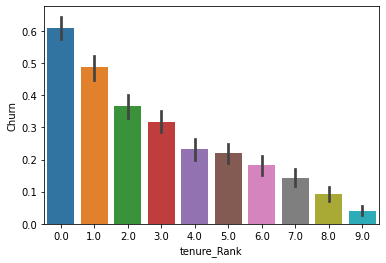

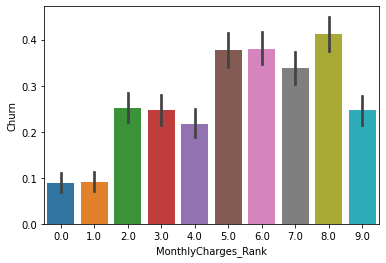

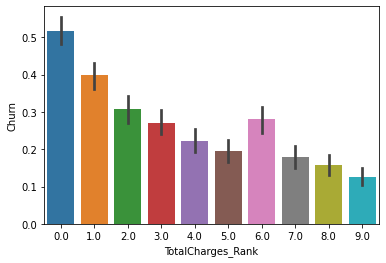

In [ ]:
#Check if the features show a slope at all
#If they do, then do you see some deciles below the population average and some higher than population average?
#If that is the case then the slope will be strong
#Conclusion: A strong slope is indicative of the features' ability to discriminate the event from non event
#            making it a good predictor

#percentage_income_goesinto_intallments=Insallment/annual_inc (Derived Variables/Feature Engineering)

X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.barplot(x=col, y="Churn",data=X_bin_combined, estimator=mean )
plt.show()

In [ ]:
# All features from num_2 will get selected due to good discrimination
select_features_df_num=num_1

In [ ]:
num_1.shape

(7043, 3)

# Feature Selection - Categorical Features

In [ ]:
char.dtypes

gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
dtype: object

# Part 1 - Bi Variate Analysis

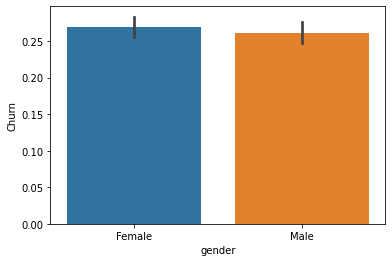

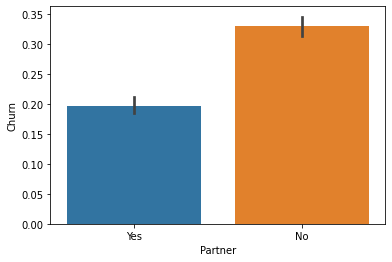

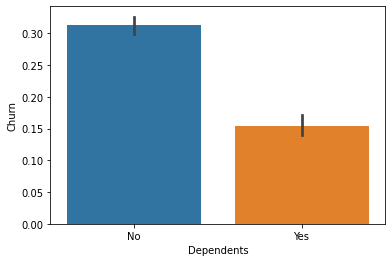

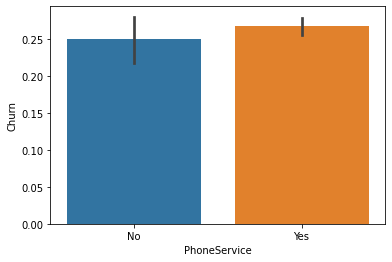

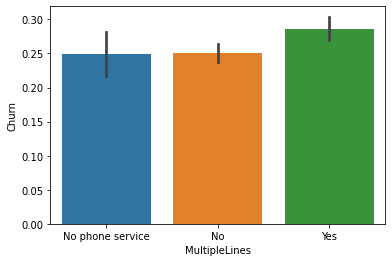

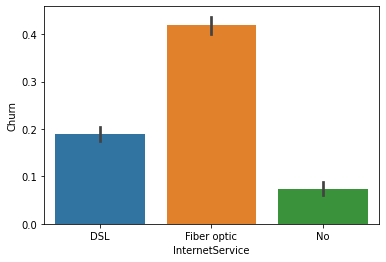

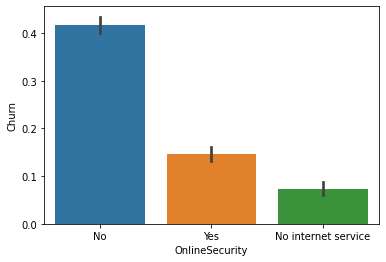

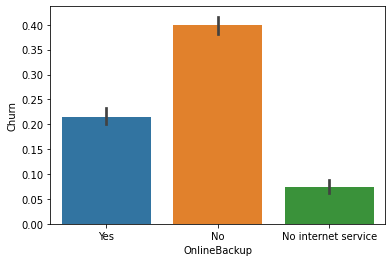

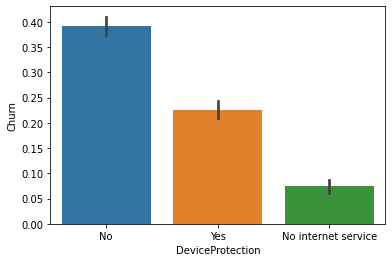

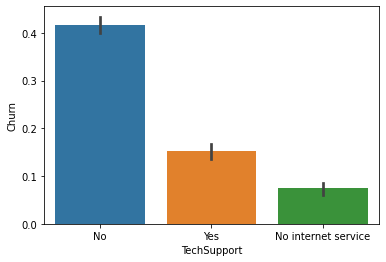

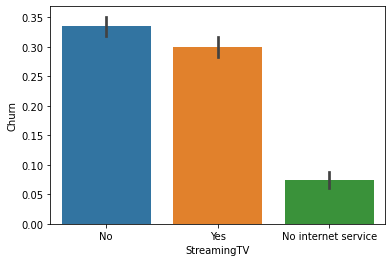

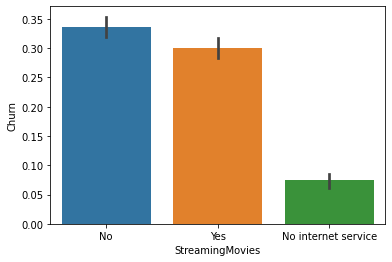

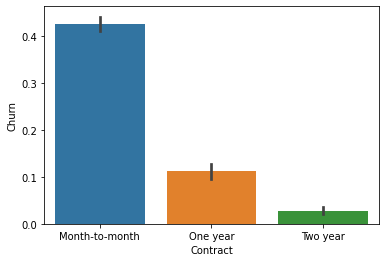

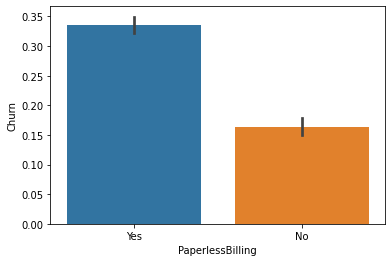

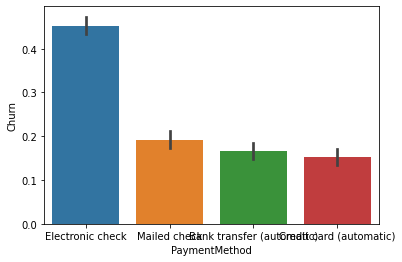

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([Y,char],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.barplot(x=col, y="Churn",data=X_char_merged, estimator=mean )
plt.show()

In [ ]:
char=char.drop(['gender','PhoneService','MultipleLines'],axis=1)

In [ ]:
# Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char, drop_first = True)
X_char_dum.shape

(7043, 22)

In [ ]:
X_char_dum

,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1
7039,1,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0
7040,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
7041,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


# Part 2 - Select K Best

In [ ]:
# Select K Best for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=20)
selector.fit_transform(X_char_dum, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]

In [ ]:
select_features_df_char.iloc[0]

Partner_Yes                              1
Dependents_Yes                           0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         1
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingMovies_No internet service      0
Contract_One year                        0
Contract_Two year                        0
PaperlessBilling_Yes                     1
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           1
PaymentMethod_Mailed check               0
Name: 0, dtype: uint8

# Feature Selection - Numerical indicator features

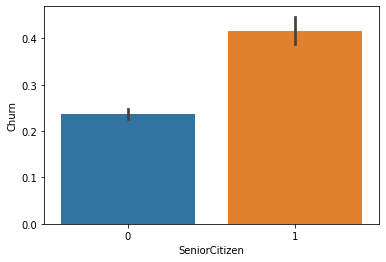

In [ ]:
X_ind_merged=pd.concat([Y,ind],axis=1,join='inner')
from numpy import mean
for col in (ind.columns):
    plt.figure()
    sns.barplot(x=col, y="Churn",data=X_ind_merged, estimator=mean )
plt.show()

In [ ]:
select_features_df_ind=ind

# Creating the Master Feature Set for Model Development

In [ ]:
X_all=pd.concat([select_features_df_char,select_features_df_num,select_features_df_ind],axis=1,join="inner")

In [ ]:
X_all

,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingMovies_No internet service,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1.0,29.85,49.070,0
1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,34.0,56.95,1889.500,0
2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,2.0,53.85,108.150,0
3,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,45.0,42.30,1840.750,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,2.0,70.70,151.650,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,24.0,84.80,1990.500,0
7039,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,72.0,103.20,6921.025,0
7040,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,11.0,29.60,346.450,0
7041,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,4.0,74.40,306.600,1


In [ ]:
Y['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X_all, Y, test_size=0.3, random_state=10)

In [ ]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",Y_train.mean())
print("Response Rate in Testing Data",Y_test.mean())

Shape of Training Data (4930, 24)
Shape of Testing Data (2113, 24)
Response Rate in Training Data Churn    0.266126
dtype: float64
Response Rate in Testing Data Churn    0.263606
dtype: float64


# Splitting Data into test and train


In [ ]:
#check for distribution of labels
#Our 73% of data is "not Churn" while "26%" oif data is of employees who have churned
Y_train.value_counts(normalize=True)

Churn
0        0.733874
1        0.266126
dtype: float64

In [ ]:
#import library
from sklearn.linear_model import LogisticRegression
lr_basemodel =LogisticRegression(random_state=0)
# train model to learn relationships between input and output variables
lr_basemodel.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [ ]:
import sklearn

In [ ]:
sklearn.__version__

'1.2.1'

In [ ]:
#We will use sklearn for building logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve
from warnings import simplefilter
import statsmodels.api as sm
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

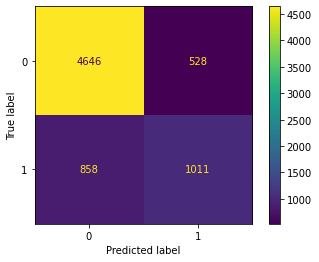

In [ ]:
#CONFUSION MATRIX DISPLAY FOR X_ALL
clf = LogisticRegression(random_state=0)
clf.fit(X_all,Y)
predictions = clf.predict(X_all)
cm = confusion_matrix(Y, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

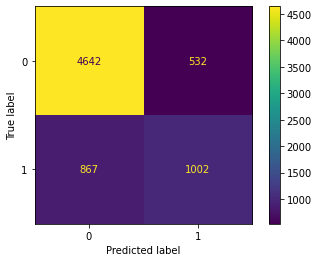

In [ ]:
ConfusionMatrixDisplay.from_estimator(lr_basemodel,X_all,Y) #new code for confusion matrix display)

In [ ]:
print("f1 score for base model is : " , f1_score(Y_test,y_pred_test))

f1 score for base model is :  0.5787401574803149


In [ ]:
#Accuracy score
print("Accuracy score  test dataset:  t", accuracy_score(Y_test,y_pred_test))
#Precision score
print("precision score  test dataset:  t", precision_score(Y_test,y_pred_test))
#Recall Score
print("Recall score  test dataset:  t", recall_score(Y_test,y_pred_test))

Accuracy score  test dataset:  t 0.7974443918599148
precision score  test dataset:  t 0.6405228758169934
Recall score  test dataset:  t 0.5278276481149012


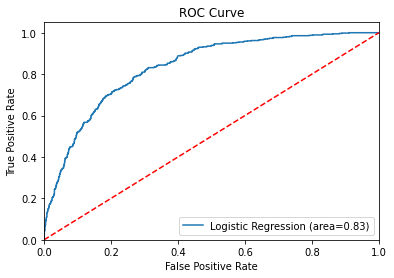

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, lr_basemodel.predict_proba(X_test)[:,1])
auc_var=auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area=%0.2f)' % auc_var)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
coeff_df=pd.DataFrame(X_all.columns)
coeff_df.columns=['features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])
coeff_df

,features,Coefficient Estimate
0,Partner_Yes,-0.039804
1,Dependents_Yes,-0.197208
2,InternetService_Fiber optic,0.473535
3,InternetService_No,-0.158320
4,OnlineSecurity_No internet service,-0.158320
5,OnlineSecurity_Yes,-0.531084
6,OnlineBackup_No internet service,-0.158320
7,OnlineBackup_Yes,-0.253900
8,DeviceProtection_No internet service,-0.158320
9,DeviceProtection_Yes,-0.143959


# Building a decision tree model

In [ ]:
# Building a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=0)

In [ ]:
np.random.seed(44)
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250] }
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist,n_jobs = 3)
tree_grid.fit(X_train,Y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 6, 'min_samples_split': 50}


In [ ]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=50)
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=50, random_state=0)

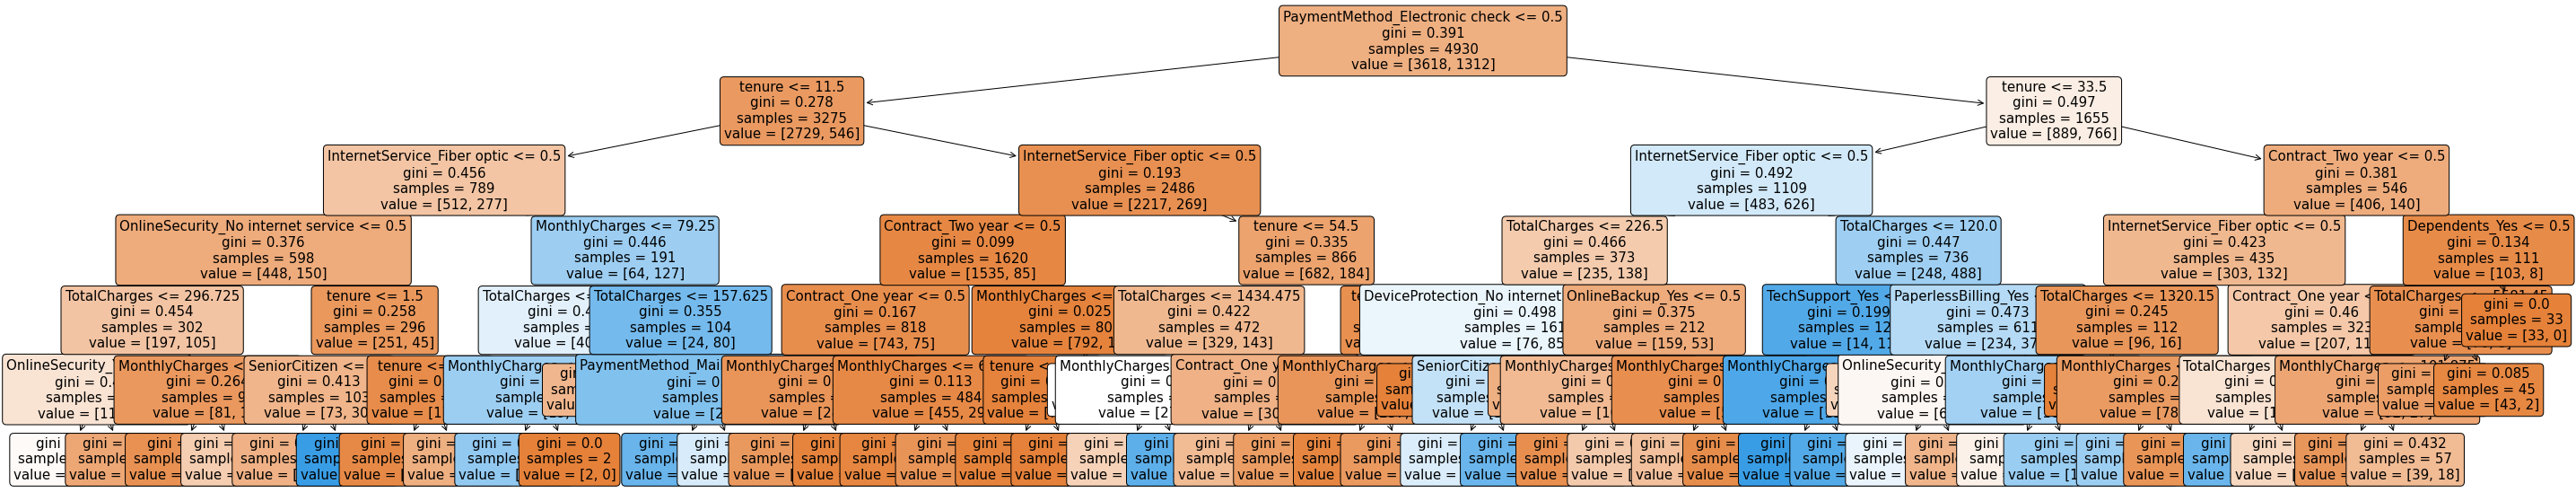

In [ ]:
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
plt.figure(figsize=[50,10])
tree.plot_tree(dtree,filled=True,fontsize=15,rounded=True,feature_names=X_all.columns)
plt.show()

# RANDOM FOREST MODEL

In [ ]:
rf = RandomForestClassifier(random_state=100, n_jobs=-1)

In [ ]:
#Max_depth: This hyperparameter represents the maximum level of each tree in the random forest model. A deeper tree performs well 
#and captures a lot of information about the training data, but will not generalize well to test data. By default, this value is 
#set to "None" in the Scikit-Learn library, which means that the trees are left to expand completely.

#Min_samples_leaf: The minimum number of samples required to be at the leaf node of each tree. The default value is 1 in Scikit-Learn.

#Min_samples_split: The minimum number of samples required to split an internal node of each tree. The default value is 2 in Scikit-Learn.

#N_estimators: The number of decision trees in the forest. The default number of estimators in Scikit-Learn is 10.

params = {
    'max_depth': [2,5,10],
    'min_samples_leaf': [5,20,100],
    'min_samples_split':[5,50,100],
    'n_estimators': [10,50,100] #This variable was not present for decision tree
}

In [ ]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [ ]:
# Takes ~2 min to run
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10],
                         'min_samples_leaf': [5, 20, 100],
                         'min_samples_split': [5, 50, 100],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy', verbose=1)

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=100,
                       n_estimators=10, n_jobs=-1, random_state=100)

In [ ]:
classifier_rf_tuned = RandomForestClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=100,
                       n_estimators=10, n_jobs=-1, random_state=100)
classifier_rf_tuned.fit(X_train, Y_train)

y_pred_tree = classifier_rf_tuned.predict(X_test)

from sklearn.metrics import accuracy_score
#Accuracy score
print("Accuracy score  test dataset:  t", accuracy_score(Y_test,y_pred_tree))

Accuracy score  test dataset:  t 0.7931850449597728


In [ ]:
import pandas as pd
feature_importances=pd.DataFrame(classifier_rf_tuned.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
tenure,0.179491
InternetService_Fiber optic,0.172128
TotalCharges,0.144812
Contract_Two year,0.132042
Contract_One year,0.055221
TechSupport_Yes,0.044271
MonthlyCharges,0.043859
PaymentMethod_Electronic check,0.039266
InternetService_No,0.039122
OnlineSecurity_Yes,0.036486


In [ ]:
# Building a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='friedman_mse',random_state=0,max_depth=6,min_samples_split=50)
gbm.fit(X_train,Y_train)

GradientBoostingClassifier(max_depth=6, min_samples_split=50, random_state=0)

In [ ]:
import pandas as pd
feature_importances=pd.DataFrame(gbm.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
tenure,0.213507
MonthlyCharges,0.178987
TotalCharges,0.166517
PaymentMethod_Electronic check,0.135038
InternetService_Fiber optic,0.128263
Contract_Two year,0.035086
Contract_One year,0.033599
PaperlessBilling_Yes,0.019744
OnlineSecurity_Yes,0.016785
TechSupport_Yes,0.014640


In [ ]:
base_learners = [
                        ('rf', RandomForestClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=50)),
                        ('gbm', GradientBoostingClassifier(criterion='friedman_mse',random_state=0,max_depth=6,min_samples_split=50))  
                       ] 

In [ ]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

In [ ]:
clf.fit(X_train, Y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=6,
                                                       min_samples_split=50,
                                                       random_state=0)),
                               ('gbm',
                                GradientBoostingClassifier(max_depth=6,
                                                           min_samples_split=50,
                                                           random_state=0))],
                   final_estimator=LogisticRegression())

In [ ]:
# Model Evaluation
y_pred_logreg=logreg.predict(X_test)
y_pred_tree=dtree.predict(X_test)
y_pred_rf=classifier_rf_tuned.predict(X_test)
y_pred_gbm=gbm.predict(X_test)
y_pred_stacking=clf.predict(X_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_logreg))
print("Precision",metrics.precision_score(Y_test,y_pred_logreg))
print("Recall",metrics.recall_score(Y_test,y_pred_logreg))
print("f1_score",metrics.f1_score(Y_test,y_pred_logreg))

Accuracy: 0.7974443918599148
Precision 0.6405228758169934
Recall 0.5278276481149012
f1_score 0.5787401574803149


[[1391  165]
 [ 263  294]]


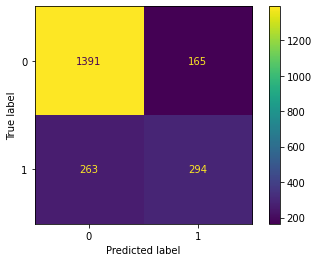

In [ ]:
ConfusionMatrix = confusion_matrix(Y_test,y_pred_logreg)
print(ConfusionMatrix)

disp = ConfusionMatrixDisplay(confusion_matrix=ConfusionMatrix, display_labels=lr_basemodel.classes_)
disp.plot()
plt.show()

#Change it from column to rows

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_tree))
print("Precision",metrics.precision_score(Y_test,y_pred_tree))
print("Recall",metrics.recall_score(Y_test,y_pred_tree))
print("f1_score",metrics.f1_score(Y_test,y_pred_tree))

Accuracy: 0.7950780880265026
Precision 0.6483253588516746
Recall 0.4865350089766607
f1_score 0.5558974358974359


[[1409  147]
 [ 286  271]]


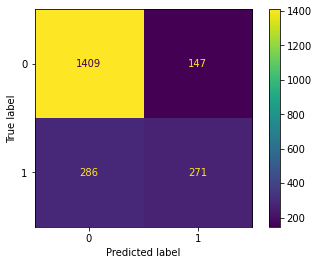

In [ ]:
ConfusionMatrix = confusion_matrix(Y_test,y_pred_tree)
print(ConfusionMatrix)

disp = ConfusionMatrixDisplay(confusion_matrix=ConfusionMatrix, display_labels=lr_basemodel.classes_)
disp.plot()
plt.show()

#Change it from column to rows

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_rf))
print("Precision",metrics.precision_score(Y_test,y_pred_rf))
print("Recall",metrics.recall_score(Y_test,y_pred_rf))
print("f1_score",metrics.f1_score(Y_test,y_pred_rf))

Accuracy: 0.7931850449597728
Precision 0.644927536231884
Recall 0.4793536804308797
f1_score 0.5499485066941298


[[1409  147]
 [ 290  267]]


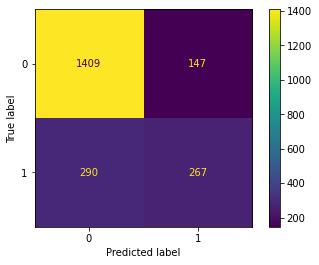

In [ ]:
ConfusionMatrix = confusion_matrix(Y_test,y_pred_rf)
print(ConfusionMatrix)

disp = ConfusionMatrixDisplay(confusion_matrix=ConfusionMatrix, display_labels=lr_basemodel.classes_)
disp.plot()
plt.show()


In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_gbm))
print("Precision",metrics.precision_score(Y_test,y_pred_gbm))
print("Recall",metrics.recall_score(Y_test,y_pred_gbm))
print("f1_score",metrics.f1_score(Y_test,y_pred_gbm))

Accuracy: 0.7998106956933271
Precision 0.6437768240343348
Recall 0.5385996409335727
f1_score 0.5865102639296188


[[1390  166]
 [ 257  300]]


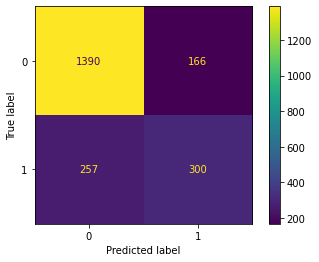

In [ ]:
ConfusionMatrix = confusion_matrix(Y_test,y_pred_gbm)
print(ConfusionMatrix)

disp = ConfusionMatrixDisplay(confusion_matrix=ConfusionMatrix, display_labels=lr_basemodel.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_stacking))
print("Precision",metrics.precision_score(Y_test,y_pred_stacking))
print("Recall",metrics.recall_score(Y_test,y_pred_stacking))
print("f1_score",metrics.f1_score(Y_test,y_pred_stacking))

Accuracy: 0.7983909133932797
Precision 0.6519721577726219
Recall 0.5044883303411131
f1_score 0.5688259109311742


[[1406  150]
 [ 276  281]]


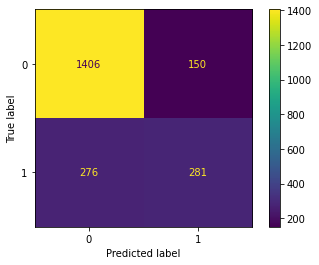

In [ ]:
ConfusionMatrix = confusion_matrix(Y_test,y_pred_stacking)
print(ConfusionMatrix)

disp = ConfusionMatrixDisplay(confusion_matrix=ConfusionMatrix, display_labels=lr_basemodel.classes_)
disp.plot()
plt.show()

In [ ]:
# Lorenz Curve

In [ ]:
# Logistic Lorenz Curve

